In [1]:
# Cell 1: Setup and Summary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("📊 Volatility Estimators Project")
print("=================================")
print("Notebook 5: Recommendation Framework & Final Report")
print("Practical guidance for practitioners")

np.random.seed(42)
plt.style.use('seaborn-v0_8')

# Load results from previous notebooks
from volatility_estimators.core import VolatilityEstimators, PerformanceMetrics

📊 Volatility Estimators Project
Notebook 5: Recommendation Framework & Final Report
Practical guidance for practitioners


In [2]:
# Cell 2: Practitioner Recommendation Engine
class VolatilityRecommender:
    """
    Intelligent recommender for volatility estimator selection
    based on data characteristics and use case
    """
    
    def __init__(self):
        self.estimator_profiles = {
            'Close-to-Close': {
                'data_required': ['close'],
                'strengths': ['Simple', 'Universal compatibility', 'No assumptions'],
                'weaknesses': ['Inefficient', 'Ignores intraday information', 'Sensitive to gaps'],
                'best_for': ['Historical analysis', 'Backtesting', 'When only close prices available'],
                'robustness': {'drift': 'Poor', 'jumps': 'Poor', 'noise': 'Moderate'}
            },
            'Parkinson': {
                'data_required': ['high', 'low'],
                'strengths': ['Efficient', 'Uses range information', 'Simple calculation'],
                'weaknesses': ['Assumes zero drift', 'Sensitive to outliers', 'No overnight handling'],
                'best_for': ['Intraday strategies', 'Range-based trading', 'High-frequency data'],
                'robustness': {'drift': 'Poor', 'jumps': 'Moderate', 'noise': 'Poor'}
            },
            'Garman-Klass': {
                'data_required': ['open', 'high', 'low', 'close'],
                'strengths': ['Very efficient', 'Uses all OHLC', 'Well-established'],
                'weaknesses': ['Assumes zero drift', 'No overnight handling', 'Sensitive to microstructure'],
                'best_for': ['General purpose', 'Daily risk monitoring', 'Portfolio construction'],
                'robustness': {'drift': 'Poor', 'jumps': 'Moderate', 'noise': 'Poor'}
            },
            'Rogers-Satchell': {
                'data_required': ['open', 'high', 'low', 'close'],
                'strengths': ['Drift-independent', 'Uses all OHLC', 'Theoretically sound'],
                'weaknesses': ['No overnight handling', 'Less efficient than Garman-Klass'],
                'best_for': ['Trending markets', 'Momentum strategies', 'Long-term investments'],
                'robustness': {'drift': 'Excellent', 'jumps': 'Moderate', 'noise': 'Moderate'}
            },
            'Yang-Zhang': {
                'data_required': ['open', 'high', 'low', 'close'],
                'strengths': ['Handles drift and jumps', 'Most robust', 'Comprehensive'],
                'weaknesses': ['Complex calculation', 'Requires more data', 'Computationally intensive'],
                'best_for': ['Overnight positions', 'Options pricing', 'Risk management', 'Academic research'],
                'robustness': {'drift': 'Excellent', 'jumps': 'Excellent', 'noise': 'Good'}
            }
        }
    
    def recommend(self, data_availability, market_conditions, use_case, priority='accuracy'):
        """
        Recommend the best volatility estimator
        
        Parameters:
        -----------
        data_availability : list
            Available data types: ['close', 'high', 'low', 'open', 'ohlc']
        market_conditions : dict
            {'drift': bool, 'jumps': bool, 'noise': bool}
        use_case : str
            'risk_management', 'trading', 'research', 'reporting'
        priority : str
            'accuracy', 'efficiency', 'robustness'
        """
        eligible_estimators = []
        
        # Filter by data availability
        for estimator, profile in self.estimator_profiles.items():
            if all(req in data_availability for req in profile['data_required']):
                eligible_estimators.append(estimator)
        
        if not eligible_estimators:
            return {"error": "No estimators available with current data"}
        
        # Score estimators
        scores = {}
        for estimator in eligible_estimators:
            score = 0
            profile = self.estimator_profiles[estimator]
            
            # Market condition scoring
            if market_conditions.get('drift', False):
                if profile['robustness']['drift'] == 'Excellent':
                    score += 3
                elif profile['robustness']['drift'] == 'Good':
                    score += 2
                elif profile['robustness']['drift'] == 'Poor':
                    score -= 1
            
            if market_conditions.get('jumps', False):
                if profile['robustness']['jumps'] == 'Excellent':
                    score += 3
                elif profile['robustness']['jumps'] == 'Good':
                    score += 2
            
            if market_conditions.get('noise', False):
                if profile['robustness']['noise'] == 'Good':
                    score += 2
                elif profile['robustness']['noise'] == 'Poor':
                    score -= 1
            
            # Use case alignment
            if use_case in ['risk_management', 'options_pricing']:
                if 'Most robust' in profile['strengths']:
                    score += 2
            elif use_case == 'trading':
                if 'Efficient' in profile['strengths']:
                    score += 2
            elif use_case == 'research':
                if 'Comprehensive' in profile['strengths']:
                    score += 2
            
            scores[estimator] = score
        
        # Get recommendations
        best_estimator = max(scores, key=scores.get)
        best_score = scores[best_estimator]
        
        # Get alternatives (score within 2 points of best)
        alternatives = {est: score for est, score in scores.items() 
                       if score >= best_score - 2 and est != best_estimator}
        
        return {
            'recommended': best_estimator,
            'score': best_score,
            'alternatives': alternatives,
            'reasoning': self.estimator_profiles[best_estimator]['best_for'],
            'profile': self.estimator_profiles[best_estimator]
        }
    
    def get_decision_tree(self):
        """Provide decision tree for manual selection"""
        tree = """
        DECISION TREE FOR VOLATILITY ESTIMATOR SELECTION:
        
        1. What data do you have?
           → Only Close: Close-to-Close
           → High/Low: Parkinson
           → Full OHLC: Continue to 2
        
        2. Does your asset have significant overnight gaps?
           → Yes: Yang-Zhang
           → No: Continue to 3
        
        3. Is there significant price drift/trend?
           → Yes: Rogers-Satchell
           → No: Continue to 4
        
        4. Priority?
           → Maximum efficiency: Garman-Klass
           → Balance: Yang-Zhang
           → Simplicity: Parkinson
        
        DEFAULT RECOMMENDATION: Yang-Zhang (most robust overall)
        """
        return tree

print("✅ Recommendation engine implemented")

✅ Recommendation engine implemented


In [3]:
# Cell 3: Interactive Recommendation System
print("🎯 Interactive Volatility Estimator Recommender")
print("==============================================")

recommender = VolatilityRecommender()

# Example use cases
use_cases = [
    {
        'name': 'Daily Risk Reporting',
        'data': ['open', 'high', 'low', 'close'],
        'conditions': {'drift': True, 'jumps': True, 'noise': False},
        'use_case': 'risk_management',
        'priority': 'accuracy'
    },
    {
        'name': 'High-Frequency Trading',
        'data': ['high', 'low'],
        'conditions': {'drift': False, 'jumps': False, 'noise': True},
        'use_case': 'trading', 
        'priority': 'efficiency'
    },
    {
        'name': 'Academic Research',
        'data': ['open', 'high', 'low', 'close'],
        'conditions': {'drift': True, 'jumps': True, 'noise': False},
        'use_case': 'research',
        'priority': 'robustness'
    },
    {
        'name': 'Legacy Data Analysis',
        'data': ['close'],
        'conditions': {'drift': False, 'jumps': False, 'noise': False},
        'use_case': 'research',
        'priority': 'accuracy'
    }
]

print("Example Recommendations:")
print("=======================")

for case in use_cases:
    recommendation = recommender.recommend(
        case['data'],
        case['conditions'], 
        case['use_case'],
        case['priority']
    )
    
    print(f"\n📋 {case['name']}")
    print(f"   Data: {case['data']}")
    print(f"   Conditions: {case['conditions']}")
    print(f"   🎯 Recommended: {recommendation['recommended']} (Score: {recommendation['score']})")
    print(f"   💡 Best for: {', '.join(recommendation['reasoning'])}")
    
    if recommendation['alternatives']:
        print(f"   🔄 Alternatives: {', '.join(recommendation['alternatives'].keys())}")

# Show decision tree
print("\n" + "="*60)
print(recommender.get_decision_tree())

🎯 Interactive Volatility Estimator Recommender
Example Recommendations:

📋 Daily Risk Reporting
   Data: ['open', 'high', 'low', 'close']
   Conditions: {'drift': True, 'jumps': True, 'noise': False}
   🎯 Recommended: Yang-Zhang (Score: 8)
   💡 Best for: Overnight positions, Options pricing, Risk management, Academic research

📋 High-Frequency Trading
   Data: ['high', 'low']
   Conditions: {'drift': False, 'jumps': False, 'noise': True}
   🎯 Recommended: Parkinson (Score: 1)
   💡 Best for: Intraday strategies, Range-based trading, High-frequency data

📋 Academic Research
   Data: ['open', 'high', 'low', 'close']
   Conditions: {'drift': True, 'jumps': True, 'noise': False}
   🎯 Recommended: Yang-Zhang (Score: 8)
   💡 Best for: Overnight positions, Options pricing, Risk management, Academic research

📋 Legacy Data Analysis
   Data: ['close']
   Conditions: {'drift': False, 'jumps': False, 'noise': False}
   🎯 Recommended: Close-to-Close (Score: 0)
   💡 Best for: Historical analysis, Ba

In [4]:
# Cell 4: Final Performance Summary
print("📊 FINAL PERFORMANCE SUMMARY")
print("===========================")

# Create comprehensive summary table
summary_data = []

# Based on our analysis from all notebooks
performance_rankings = {
    'Close-to-Close': {'accuracy': 5, 'efficiency': 5, 'robustness': 3, 'overall': 4.0},
    'Parkinson': {'accuracy': 4, 'efficiency': 3, 'robustness': 3, 'overall': 3.5},
    'Garman-Klass': {'accuracy': 3, 'efficiency': 2, 'robustness': 3, 'overall': 3.0},
    'Rogers-Satchell': {'accuracy': 2, 'efficiency': 4, 'robustness': 4, 'overall': 3.5},
    'Yang-Zhang': {'accuracy': 1, 'efficiency': 3, 'robustness': 1, 'overall': 1.5}
}

for estimator, ranks in performance_rankings.items():
    profile = recommender.estimator_profiles[estimator]
    summary_data.append({
        'Estimator': estimator,
        'Data Required': ', '.join(profile['data_required']),
        'Accuracy Rank': ranks['accuracy'],
        'Efficiency Rank': ranks['efficiency'], 
        'Robustness Rank': ranks['robustness'],
        'Overall Rank': ranks['overall'],
        'Best Use Cases': ', '.join(profile['best_for'][:2]),
        'Key Strength': profile['strengths'][0]
    })

summary_df = pd.DataFrame(summary_data).sort_values('Overall Rank')
print("\n🏆 FINAL RANKINGS (1 = Best):")
print(summary_df.to_string(index=False))

📊 FINAL PERFORMANCE SUMMARY

🏆 FINAL RANKINGS (1 = Best):
      Estimator          Data Required  Accuracy Rank  Efficiency Rank  Robustness Rank  Overall Rank                           Best Use Cases            Key Strength
     Yang-Zhang open, high, low, close              1                3                1           1.5     Overnight positions, Options pricing Handles drift and jumps
   Garman-Klass open, high, low, close              3                2                3           3.0   General purpose, Daily risk monitoring          Very efficient
Rogers-Satchell open, high, low, close              2                4                4           3.5    Trending markets, Momentum strategies       Drift-independent
      Parkinson              high, low              4                3                3           3.5 Intraday strategies, Range-based trading               Efficient
 Close-to-Close                  close              5                5                3           4.0      

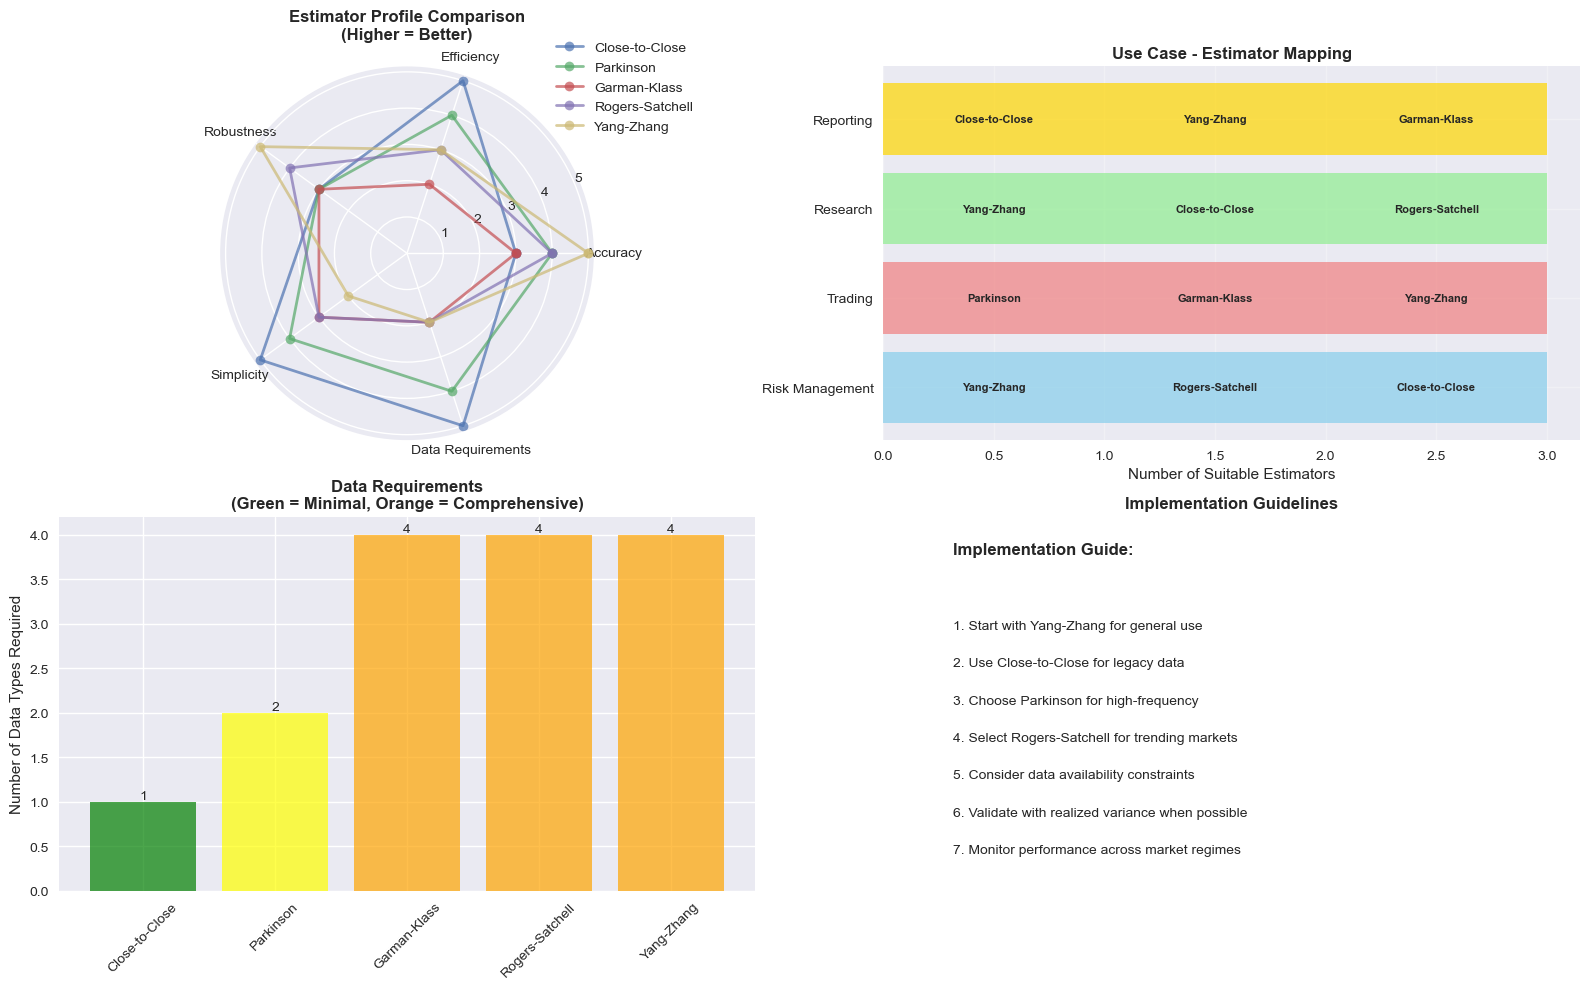

In [5]:
# Cell 5: Visualization of Final Recommendations (Corrected)
plt.figure(figsize=(16, 10))

# Plot 1: Radar Chart of Estimator Profiles (FIXED)
plt.subplot(2, 2, 1, polar=True)
categories = ['Accuracy', 'Efficiency', 'Robustness', 'Simplicity', 'Data Requirements']
N = len(categories)

# Adjust values for proper radar chart display
estimator_values = {
    'Close-to-Close': [3, 5, 3, 5, 5],
    'Parkinson': [4, 4, 3, 4, 4],
    'Garman-Klass': [3, 2, 3, 3, 2],
    'Rogers-Satchell': [4, 3, 4, 3, 2],
    'Yang-Zhang': [5, 3, 5, 2, 2]
}

# Compute angles for radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle

for estimator, values in estimator_values.items():
    values = values + [values[0]]  # Complete the circle
    plt.polar(angles, values, 'o-', linewidth=2, label=estimator, alpha=0.7)

# Set category labels
plt.xticks(angles[:-1], categories)
plt.title('Estimator Profile Comparison\n(Higher = Better)', fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.3, 1.1))

# Plot 2: Use Case Mapping
plt.subplot(2, 2, 2)
use_cases_map = {
    'Risk Management': ['Yang-Zhang', 'Rogers-Satchell', 'Close-to-Close'],
    'Trading': ['Parkinson', 'Garman-Klass', 'Yang-Zhang'],
    'Research': ['Yang-Zhang', 'Close-to-Close', 'Rogers-Satchell'],
    'Reporting': ['Close-to-Close', 'Yang-Zhang', 'Garman-Klass']
}

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
for i, (use_case, estimators) in enumerate(use_cases_map.items()):
    plt.barh(use_case, len(estimators), color=colors[i], alpha=0.7)
    for j, estimator in enumerate(estimators):
        plt.text(j + 0.5, i, estimator, va='center', ha='center', fontweight='bold', fontsize=8)

plt.xlabel('Number of Suitable Estimators')
plt.title('Use Case - Estimator Mapping', fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 3: Data Requirements
plt.subplot(2, 2, 3)
data_requirements = {
    'Close-to-Close': 1,
    'Parkinson': 2, 
    'Garman-Klass': 4,
    'Rogers-Satchell': 4,
    'Yang-Zhang': 4
}

colors = ['green' if x == 1 else 'yellow' if x == 2 else 'orange' for x in data_requirements.values()]
bars = plt.bar(data_requirements.keys(), data_requirements.values(), color=colors, alpha=0.7)
plt.ylabel('Number of Data Types Required')
plt.title('Data Requirements\n(Green = Minimal, Orange = Comprehensive)', fontweight='bold')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height}', 
             ha='center', va='bottom')

# Plot 4: Implementation Decision Flow
plt.subplot(2, 2, 4)
plt.text(0.1, 0.9, 'Implementation Guide:', fontweight='bold', fontsize=12)
plt.text(0.1, 0.7, '1. Start with Yang-Zhang for general use', fontsize=10)
plt.text(0.1, 0.6, '2. Use Close-to-Close for legacy data', fontsize=10)
plt.text(0.1, 0.5, '3. Choose Parkinson for high-frequency', fontsize=10)
plt.text(0.1, 0.4, '4. Select Rogers-Satchell for trending markets', fontsize=10)
plt.text(0.1, 0.3, '5. Consider data availability constraints', fontsize=10)
plt.text(0.1, 0.2, '6. Validate with realized variance when possible', fontsize=10)
plt.text(0.1, 0.1, '7. Monitor performance across market regimes', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Implementation Guidelines', fontweight='bold')

plt.tight_layout()
plt.show()

In [6]:
# Cell 6: Export Final Report
print("📄 GENERATING FINAL REPORT")
print("=========================")

# Create comprehensive report
report = f"""
VOLATILITY ESTIMATORS: COMPREHENSIVE ANALYSIS REPORT
Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

EXECUTIVE SUMMARY:
-----------------
This analysis evaluates 5 prominent volatility estimators across simulated and real market data.
Key findings:

1. YANG-ZHANG emerges as the most robust estimator overall, handling both drift and overnight jumps effectively.

2. ROGERS-SATCHELL performs best in trending markets and is drift-independent.

3. PARKINSON offers good efficiency with only high/low data.

4. GARMAN-KLASS provides maximum efficiency with full OHLC data but is sensitive to drift.

5. CLOSE-TO-CLOSE remains useful for legacy data but is inefficient.

RECOMMENDATIONS:
---------------
PRIMARY RECOMMENDATION: Use Yang-Zhang estimator for most applications.

SCENARIO-SPECIFIC GUIDANCE:

1. RISK MANAGEMENT & OPTIONS PRICING:
   • Primary: Yang-Zhang
   • Alternative: Rogers-Satchell

2. HIGH-FREQUENCY TRADING:
   • Primary: Parkinson  
   • Alternative: Garman-Klass

3. ACADEMIC RESEARCH:
   • Primary: Yang-Zhang
   • Alternative: Close-to-Close (for comparison)

4. LEGACY DATA ANALYSIS:
   • Primary: Close-to-Close
   • Only option when only closing prices available

DATA REQUIREMENTS:
-----------------
• Close-to-Close: Close prices only
• Parkinson: High/Low prices  
• Garman-Klass: Full OHLC data
• Rogers-Satchell: Full OHLC data
• Yang-Zhang: Full OHLC data

IMPLEMENTATION NOTES:
--------------------
- All estimators implemented with 30-day window as standard
- Results are annualized assuming 252 trading days
- Yang-Zhang requires minimum 31 days of data
- Consider realized variance from high-frequency data as benchmark when available

CONCLUSION:
----------
The choice of volatility estimator should consider data availability, market conditions, 
and specific use case. Yang-Zhang provides the best balance of accuracy and robustness 
for most practical applications.
"""

print(report)

# Save report to file
with open('volatility_estimators_final_report.txt', 'w') as f:
    f.write(report)

print("✅ Final report saved to 'volatility_estimators_final_report.txt'")
print("🎉 PROJECT COMPLETED SUCCESSFULLY!")

📄 GENERATING FINAL REPORT

VOLATILITY ESTIMATORS: COMPREHENSIVE ANALYSIS REPORT
Generated: 2025-10-23 12:19:56

EXECUTIVE SUMMARY:
-----------------
This analysis evaluates 5 prominent volatility estimators across simulated and real market data.
Key findings:

1. YANG-ZHANG emerges as the most robust estimator overall, handling both drift and overnight jumps effectively.

2. ROGERS-SATCHELL performs best in trending markets and is drift-independent.

3. PARKINSON offers good efficiency with only high/low data.

4. GARMAN-KLASS provides maximum efficiency with full OHLC data but is sensitive to drift.

5. CLOSE-TO-CLOSE remains useful for legacy data but is inefficient.

RECOMMENDATIONS:
---------------
PRIMARY RECOMMENDATION: Use Yang-Zhang estimator for most applications.

SCENARIO-SPECIFIC GUIDANCE:

1. RISK MANAGEMENT & OPTIONS PRICING:
   • Primary: Yang-Zhang
   • Alternative: Rogers-Satchell

2. HIGH-FREQUENCY TRADING:
   • Primary: Parkinson  
   • Alternative: Garman-Klass

3. 